### Student Information
Name:林明杉

Student ID:108012007

GitHub ID: max-lin-texan

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [ ]:
##### First Part #####

In [36]:
#copied code from Lab1 Master
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))




In [37]:
#EX2

# construct dataframe from a list
X.loc[lambda X: X['category'] != 1, :].loc[10:100]
# I tried double locs with function "lambda"

text  category  \
10   From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
12   From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
13   Subject: So what is Maddi? From: madhaus@netco...         0   
16   From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   
17   Organization: Penn State University From: <JSN...         0   
..                                                 ...       ...   
93   From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
95   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
97   From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   
99   From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...         0   
100  From: mathew <mathew@mantis.co.uk> Subject: Re...         0   

              category_name  
10   soc.religion.christian  
12              alt.atheism  
13              alt.atheism  
16                  sci.med  
17              alt.atheism  
..                      ...  
93   soc.religion.christian  
95              alt.atheism  
97                  sci.med  
99              alt.atheism  
100             alt.atheism  

[63 rows x 3 columns]

In [38]:
#copied code from Lab1 Master

X.isnull().apply(lambda x: dmh.check_missing_values(x))

X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

dummy_series.to_frame().T

result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

X.isnull().apply(lambda x: dmh.check_missing_values(x))

X.dropna(inplace=True)

X.isnull().apply(lambda x: dmh.check_missing_values(x))



text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

In [39]:
#EX5

import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

NA_df['missing_example'].isnull()

#Since 'NaN', 'None' and '' are all string type, they will be detected as string instead of NaN type.
#Hence, the isnull() function will return three "True" values, not all "False" values.


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [40]:
#copied code from Lab1 Master

X.duplicated()

dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

X_sample = X.sample(n=1000,random_state=42) #random state



In [41]:
#EX6

#Changes: 1. Length: We set the sampling length to be 1000, and the original length of X is 2257.
#Changes: 2. Order: The X_sample's order is based on random state, and the original order of X is same as the original data.

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

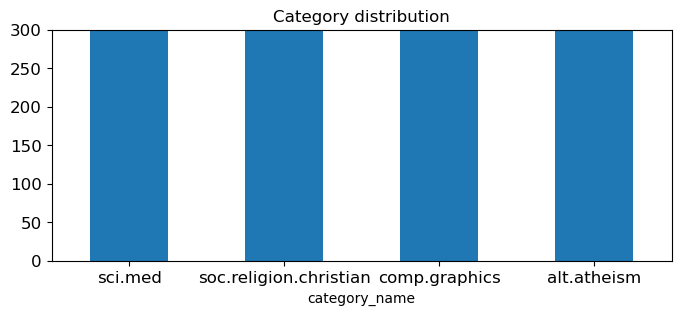

In [42]:
#copied code from Lab1 master

import matplotlib.pyplot as plt
%matplotlib inline

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))



277
category_name
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

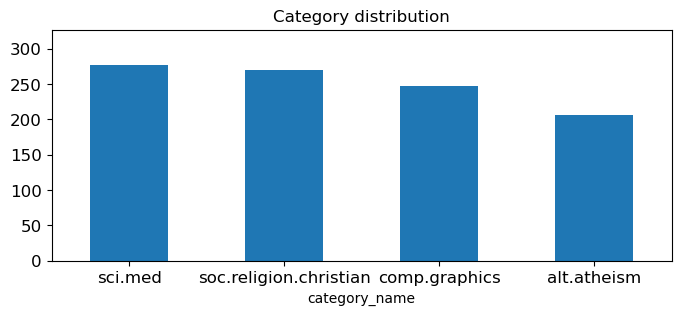

In [43]:
#EX7

# It is possible, we can assign a parameter exceeding maximum number of name counts for a little. Then use this parameter as the upperbound of ylim.
# Hence we don't need to set a specific number as an upperbound. We will automatically have a proper ylim.

# plot barchart for X_sample
print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))


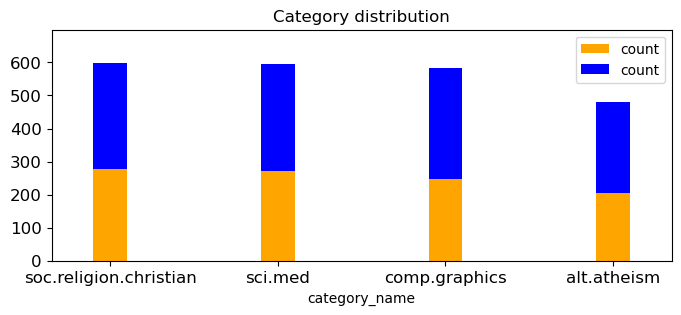

In [44]:
#EX8

upper_bound = max(X.category_name.value_counts() + 100)
S1 = X.category_name.value_counts()
D1 = S1.to_frame()
S2 = X_sample.category_name.value_counts()
D2 = S2.to_frame()

S2.plot(x = 1, kind = 'bar',
        color = 'orange',
      title = 'Category distribution',
      ylim = [0, upper_bound], 
      rot = 0, fontsize = 12, figsize = (8,3),
       width = 0.2,
       zorder = 2)
S2.name = ("category_name")
plt.legend(loc = 'upper right')

S1.plot(x = 2, kind = 'bar',
        color = 'blue',
      title = 'Category distribution',
      ylim = [0, upper_bound], 
      rot = 0, fontsize = 12, figsize = (8,3),
       width = 0.2,
       zorder = 1)
S1.name = ("category_name")
plt.legend(loc = 'upper right')



# I cannot convert stacked bar chart to unstacked bar chart using Series instead of DataFrame.


In [45]:
#copied code from Lab1 Master

import nltk
nltk.download('punkt')

# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

analyze = count_vect.build_analyzer()

analyze = count_vect.build_analyzer()


[nltk_data] Downloading package punkt to /Users/maxlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#EX10

words = count_vect.get_feature_names_out()
for i in range(0,len(X)):
    for j in range(0,len(words)):
        if X_counts[i:i+1, j:j+1] == 1:
            pass   
            #print(words[j])


term_00  term_000  term_0000  term_0000001200  term_000005102000  \
doc_0         0         0          0                0                  0   
doc_1         0         0          0                0                  0   
doc_2         0         0          0                0                  0   
doc_3         0         0          0                0                  0   
doc_4         1         0          0                0                  0   
doc_5         1         0          0                0                  0   
doc_6         0         0          0                0                  0   
doc_7         0         0          0                0                  0   
doc_8         0         0          0                0                  0   
doc_9         0         0          0                0                  0   
doc_10        0         0          0                0                  0   
doc_11        0         0          0                0                  0   
doc_12        0         0          0                0                  0   
doc_13        0         0          0                0                  0   
doc_14        0         0          0                0                  0   
doc_15        0         0          0                0                  0   
doc_16        0         0          0                0                  0   
doc_17        0         0          0                0                  0   
doc_18        0         0          0                0                  0   
doc_19        0         0          0                0                  0   

        term_0001  term_000100255pixel  term_00014  term_000406  term_0007  \
doc_0           0                    0           0            0          0   
doc_1           0                    0           0            0          0   
doc_2           0                    0           0            0          0   
doc_3           0                    0           0            0          0   
doc_4           0                    0           0            0          0   
doc_5           0                    0           0            0          0   
doc_6           0                    0           0            0          0   
doc_7           0                    0           0            0          0   
doc_8           0                    0           0            0          0   
doc_9           0                    0           0            0          0   
doc_10          0                    0           0            0          0   
doc_11          0                    0           0            0          0   
doc_12          0                    0           0            0          0   
doc_13          0                    0           0            0          0   
doc_14          0                    0           0            0          0   
doc_15          0                    0           0            0          0   
doc_16          0                    0           0            0          0   
doc_17          0                    0           0            0          0   
doc_18          0                    0           0            0          0   
doc_19          0                    0           0            0          0   

        term_000usd  term_0010  term_001004  term_0010580b  term_001125  \
doc_0             0          0            0              0            0   
doc_1             0          0            0              0            0   
doc_2             0          0            0              0            0   
doc_3             0          0            0              0            0   
doc_4             0          0            0              0            0   
doc_5             0          0            0              0            0   
doc_6             0          0            0              0            0   
doc_7             0          0            0              0            0   
doc_8             0          0            0              0            0   
doc_9             0   

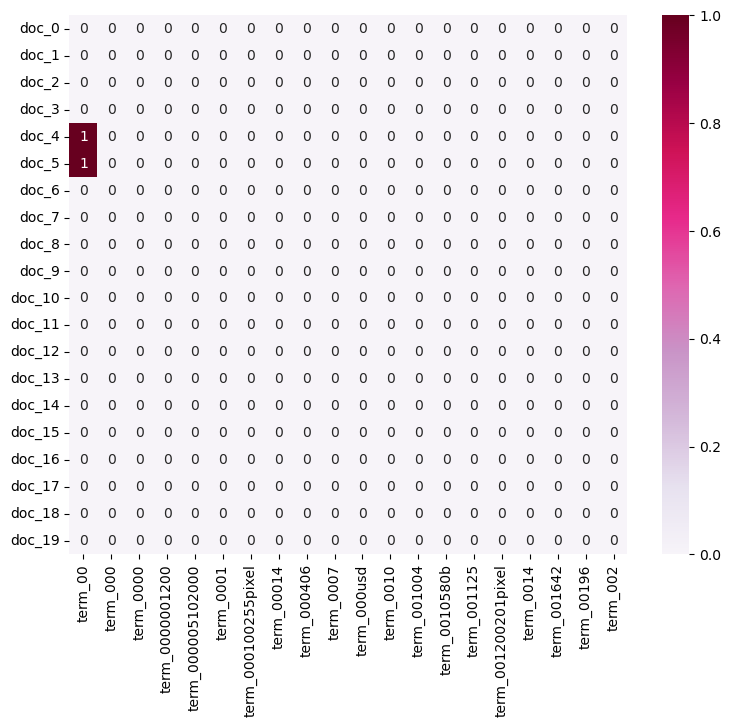

In [47]:
#copied code from Lab1 Master

# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)



In [53]:
#EX11

# Filtering the total appearance in all the documents for all vocabs, and delete those who have 0 appearance in total.

plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[:]]
plot_y = ["doc_" + str(i) for i in list(X.index)[:]]
record = []
for x in range(0,len(plot_x)):
    temp = X_counts[:,x:x+1].toarray()
    if sum(temp[0]) != 0:
        record.append(x)


       
plot_z = X_counts[:, record].toarray()
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[record]]

#df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
#display(df_todraw)
#plt.subplots(figsize=(9, 7))
#ax = sns.heatmap(df_todraw,
#                 cmap="PuRd",
#                 vmin=0, vmax=1, annot=True)


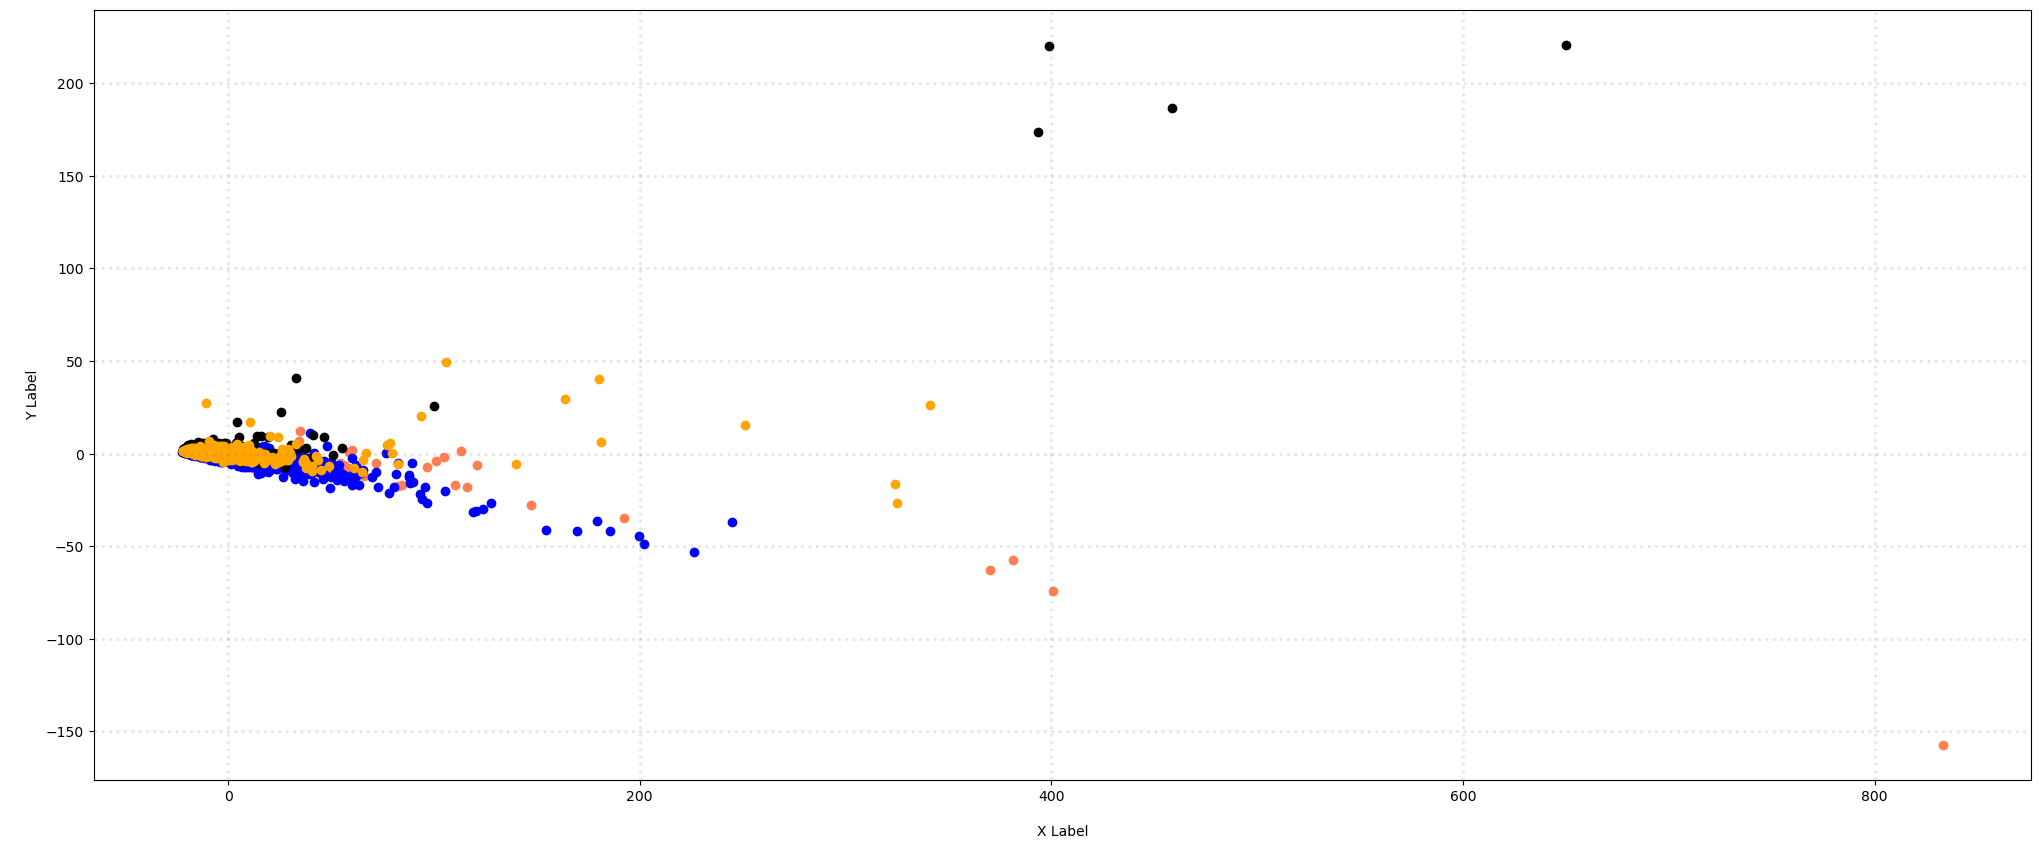

In [48]:
#copied code from Lab1 Master

from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()



  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (2256, 13740)	1
  (2256, 14662)	1
  (2256, 20201)	1
  (2256, 12443)	6
  (2256, 30325)	3
  (2256, 4610)	1
  (2256, 33844)	1
  (2256, 17354)	1
  (2256, 26998)	1
  (2256, 20277)	1
  (2256, 20695)	1
  (2256, 20702)	1
  (2256, 9649)	1
  (2256, 9086)	1
  (2256, 26254)	1
  (2256, 17133)	2
  (2256, 4490)	1
  (2256, 13720)	1
  (2256, 5016)	1
  (2256, 9632)	1
  (2256, 11824)	1
  (2256, 29993)	1
  (2256, 1298)	1
  (2256, 2375)	1
  (2256, 3921)	1
[[-17.01172954   0.45016638  -1.31226075]
 [ -6.80574586  -1.15880602  -0.40488281]
 [ 15.79461065   3.62233102  12.70799053]
 ...
 [ 19.97508176  -2.85495803   1.04076619]
 [163.885237

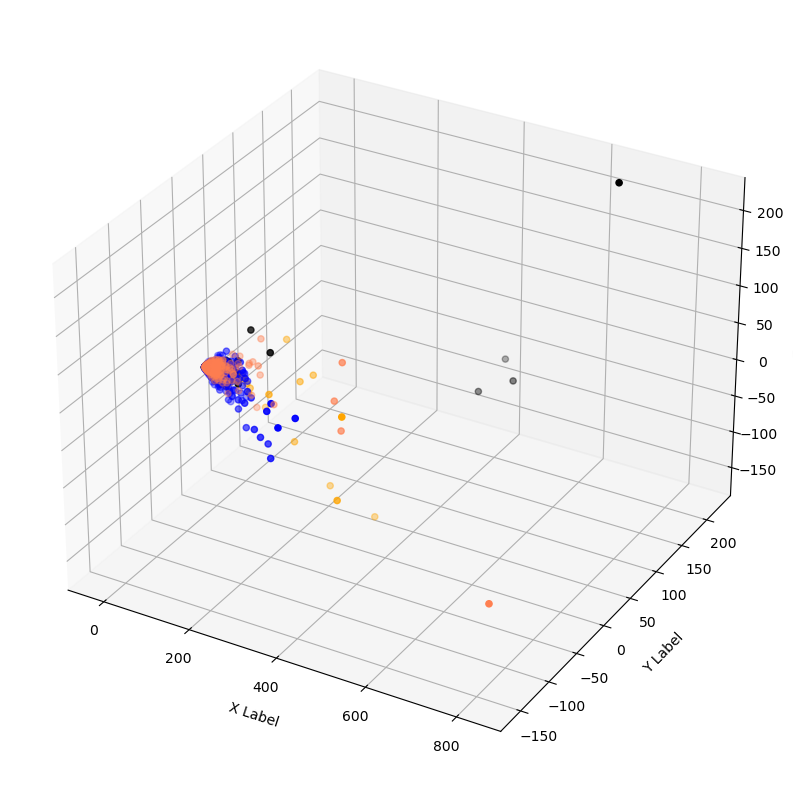

In [49]:
#EX12

print(X_counts)
X_reduced_new = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced_new)


ax = plt.figure(figsize = (25,10)).add_subplot(projection='3d')

col = ['coral', 'blue', 'black', 'orange']
for c, category in zip(col, categories):
    xs = X_reduced_new[X['category_name'] == category].T[0]
    ys = X_reduced_new[X['category_name'] == category].T[1]
    zs = X_reduced_new[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

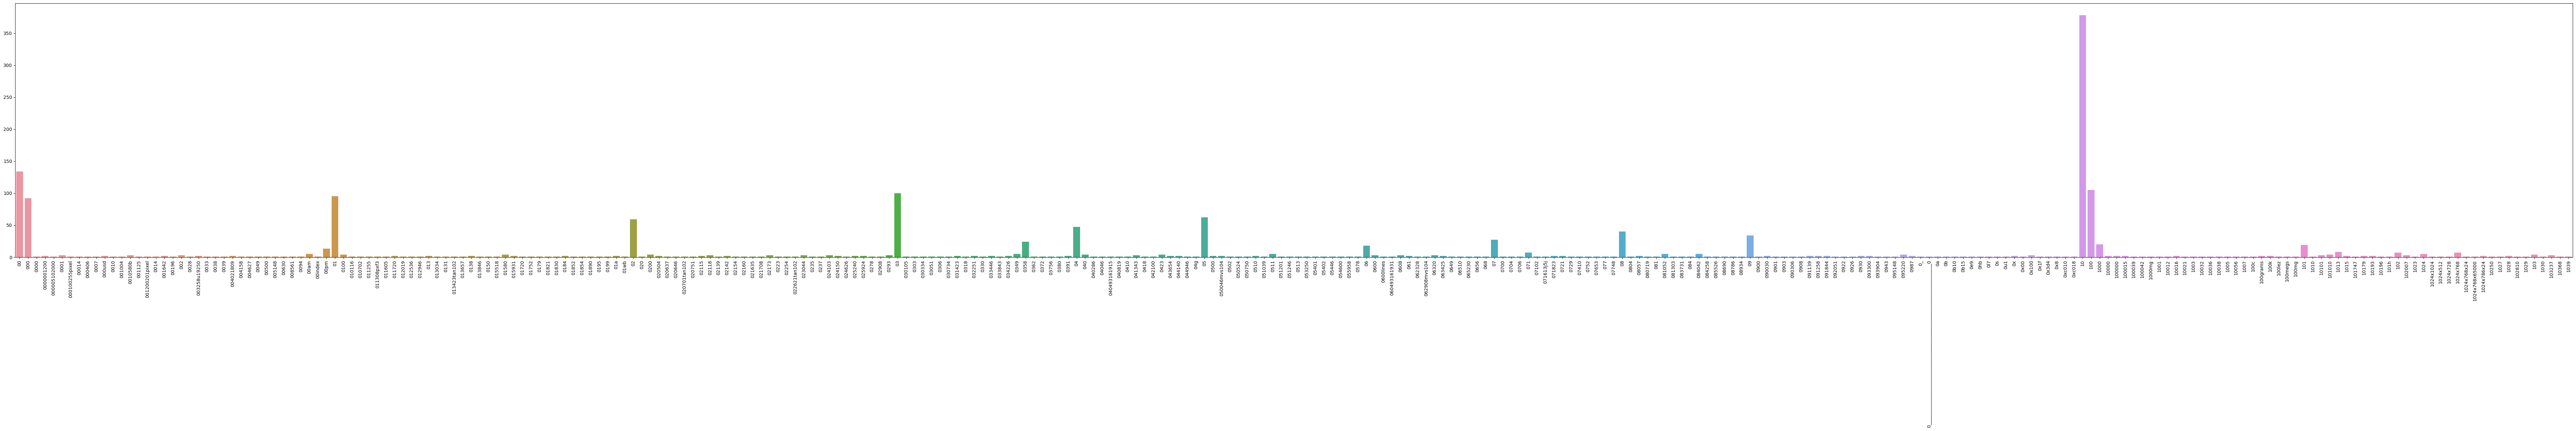

In [50]:
#copied code from Lab2

# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []

for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);




In [25]:
#EX13

import plotly.express as px
import pandas as pd

X = count_vect.get_feature_names_out()[:300]
Y = term_frequencies[:300]
DF = pd.DataFrame(dict(features_name = X, term_frequencies = Y))
figure = px.bar(DF, x = 'features_name', y = 'term_frequencies')

figure.show()



In [32]:
#EX14

# I try to reduce the number to about 30, remaining only about 10% of original data.
# The criteria is to ignore the features_name with too little frequencies or almost with zero frequency.

X = count_vect.get_feature_names_out()[:300] #original
Y = term_frequencies[:300]

X_new = []
Y_new = []

order = sorted(Y)[-30:]
criteria = order[0]

for i in range(0,len(X)):
    if(Y[i] >= criteria):
        X_new.append(X[i])
        Y_new.append(Y[i])

DF = pd.DataFrame(dict(features_name = X_new, term_frequencies = Y_new))
figure = px.bar(DF, x = 'features_name', y = 'term_frequencies')

figure.show()


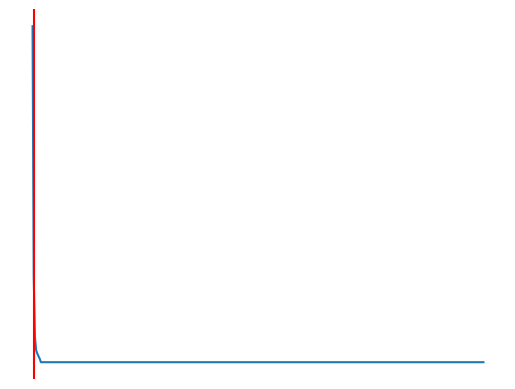

In [33]:
#EX15

from scipy.interpolate import make_interp_spline

#count_vect.get_feature_names_out()[:300]
TF = sorted(term_frequencies[:300])

SSTF = sorted(set(TF))

FREQ = []
for i in SSTF:
    FREQ.append(list(TF).count(i) - 1)


SSTF = np.array(SSTF)
FREQ = np.array(FREQ)

area_under_curve = np.trapz(FREQ, SSTF)
target_area = area_under_curve / 2.0
x_cut = 0

for i in range(len(SSTF) - 1):
    area = np.trapz(FREQ[:i+1], SSTF[:i+1])
    if area > target_area:
        x_cut = SSTF[i]
        break
x_smooth = np.linspace(SSTF.min(), SSTF.max(), 1000)
spl = make_interp_spline(SSTF, FREQ, k=3)  # Cubic spline interpolation
y_smooth = spl(x_smooth)

plt.plot(SSTF, FREQ)

plt.axis('off')

plt.axvline(x = x_cut, color='r', linestyle='-')

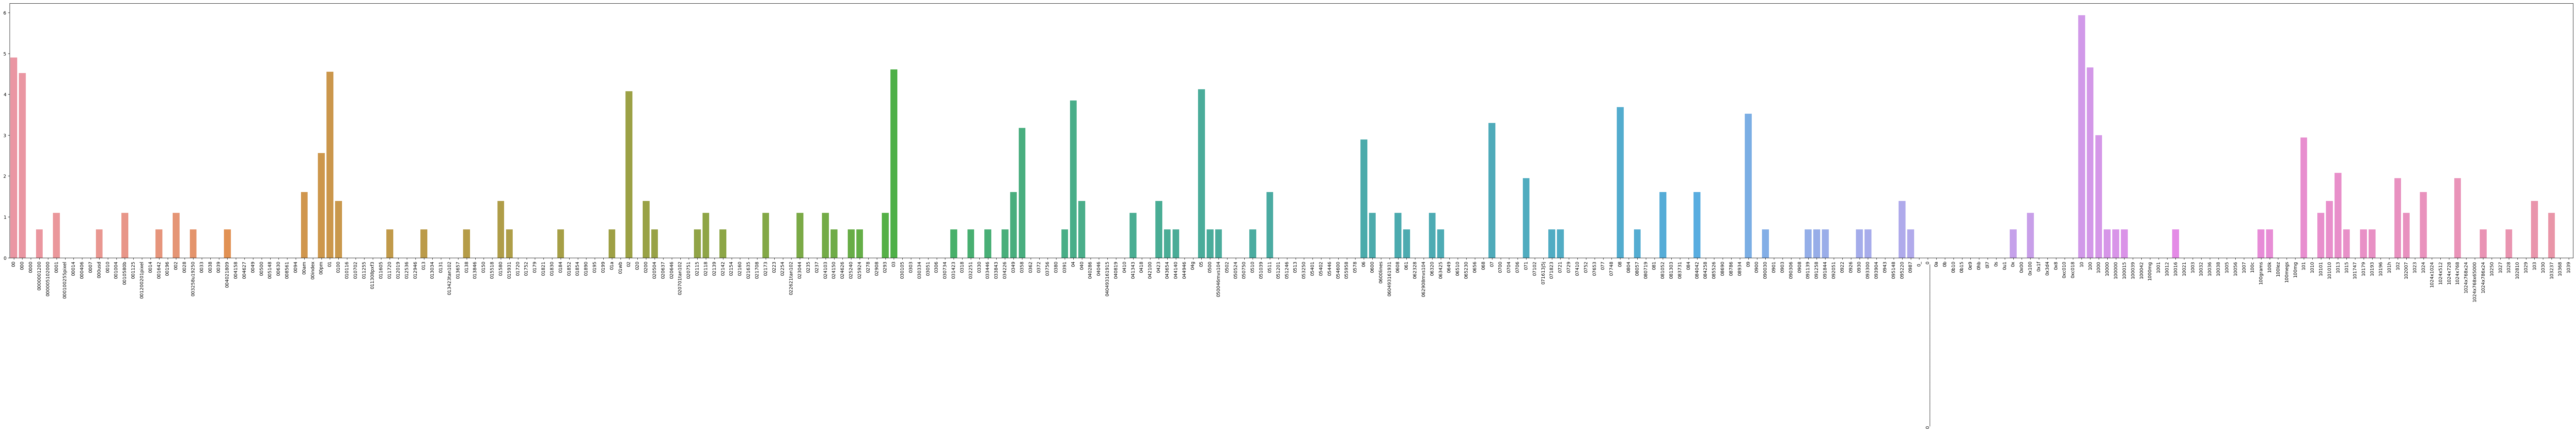

In [51]:
#copied code from Lab1 Master

import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category)

X['bin_category'] = mlb.transform(X['category']).tolist()



In [52]:
#EX16

New = preprocessing.LabelBinarizer()
New.fit(X.category_name)
X['bin_category'] = New.transform(X['category_name']).tolist()
X[0:9]

#It also works

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

In [ ]:
##### Second Part #####

In [58]:
readme = "sentiment labelled sentences/readme.txt"
ACL = "sentiment labelled sentences/amazon_cells_labelled.txt"
IL = "sentiment labelled sentences/imdb_labelled.txt"
YL = "sentiment labelled sentences/yelp_labelled.txt"


In [59]:
f = open(readme, 'r')

for i in f.readlines():
    print(i)

This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

Please cite the paper if you want to use it :)



It contains sentences labelled with positive or negative sentiment, extracted from reviews of products, movies, and restaurants




Format:


sentence \t score \n






Details:


Score is either 1 (for positive) or 0 (for negative)	

The sentences come from three different websites/fields:



imdb.com

amazon.com

yelp.com



For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews. 

We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.







For the full datasets look:



imdb: Maas et. al., 2011 'Learning word vectors for sentiment analysis'

amazon: McAuley et. al., 2013 'Hidden factors and hidden topics: Understanding rating dimensions with review text'


In [74]:
f = open(ACL, 'r')

sentence_ACL = []
score_ACL = []

for i in f.readlines():
    sentence = i.split("\t")[0]
    score = int(i.split("\t")[1].split("\n")[0])
    sentence_ACL.append(sentence)
    score_ACL.append(score)
    
sentence_ACL

    




['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.',
 'Great for the jawbone.',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
 'The mic is great.',
 'I have to jiggle the plug to get it to line up right to get decent volume.',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
 'If you are Razr owner...you must have this!',
 'Needless to say, I wasted my money.',
 'What a waste of money and time!.',
 'And the sound quality is great.',
 'He was very impressed when going from the original battery to the extended battery.',
 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.',
 'Very good quality though',
 'The design is very odd, as the ear "clip" is not very comfortable at all.',
 'Highly recommend for any one who has a blue tooth phone.',
 'I advise EVERYO

In [75]:
f = open(IL, 'r')

sentence_IL = []
score_IL = []


for i in f.readlines():
    sentence = i.split("\t")[0]
    score = int(i.split("\t")[1].split("\n")[0])
    sentence_IL.append(sentence)
    score_IL.append(score)

    
sentence_IL

['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ',
 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ',
 'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ',
 'Very little music or anything to speak of.  ',
 'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  ',
 "The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  ",
 'Wasted two hours.  ',
 'Saw the movie today and thought it was a good effort, good messages for kids.  ',
 'A bit predictable.  ',
 'Loved the casting of Jimmy Buffet as the science teacher.  ',
 'And those baby owls were adorable.  ',
 "The movie showed a lot of Florida at it's best, made it look very appealing.  ",
 'The Son

In [76]:
f = open(YL, 'r')

sentence_YL = []
score_YL = []

for i in f.readlines():
    sentence = i.split("\t")[0]
    score = int(i.split("\t")[1].split("\n")[0])
    sentence_YL.append(sentence)
    score_YL.append(score)
    
sentence_YL

['Wow... Loved this place.',
 'Crust is not good.',
 'Not tasty and the texture was just nasty.',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
 'The selection on the menu was great and so were the prices.',
 'Now I am getting angry and I want my damn pho.',
 "Honeslty it didn't taste THAT fresh.)",
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
 'The fries were great too.',
 'A great touch.',
 'Service was very prompt.',
 'Would not go back.',
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
 'I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!',
 'I was disgusted because I was pretty sure that was human hair.',
 'I was shocked because no signs indicate cash only.',
 'Highly recommended.',
 'Waitress was a little slow in service.',
 'This place is not worth your time, let alone Vegas.',
 'did not like at all.'

In [96]:
#combine three files into DataFrame

sentence_all = sentence_ACL + sentence_IL + sentence_YL
score_all = score_ACL + score_IL + score_YL

data = {"text": sentence_all, "emotion": score_all}

DF = pd.DataFrame(data)

DF

text  emotion
0     So there is no way for me to plug it in here i...        0
1                           Good case, Excellent value.        1
2                                Great for the jawbone.        1
3     Tied to charger for conversations lasting more...        0
4                                     The mic is great.        1
...                                                 ...      ...
2995  I think food should have flavor and texture an...        0
2996                           Appetite instantly gone.        0
2997  Overall I was not impressed and would not go b...        0
2998  The whole experience was underwhelming, and I ...        0
2999  Then, as if I hadn't wasted enough of my life ...        0

[3000 rows x 2 columns]

In [82]:
#some techniques from Lab1 Master to have a check and do something else on the dataframe

DF.isnull().any()

text       False
emotion    False
dtype: bool

In [83]:
DF.isnull().apply(lambda x: dmh.check_missing_values(x))

text                             emotion
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [84]:
DF[DF['emotion'] == 0]

text  emotion
0     So there is no way for me to plug it in here i...        0
3     Tied to charger for conversations lasting more...        0
5     I have to jiggle the plug to get it to line up...        0
6     If you have several dozen or several hundred c...        0
8                   Needless to say, I wasted my money.        0
...                                                 ...      ...
2995  I think food should have flavor and texture an...        0
2996                           Appetite instantly gone.        0
2997  Overall I was not impressed and would not go b...        0
2998  The whole experience was underwhelming, and I ...        0
2999  Then, as if I hadn't wasted enough of my life ...        0

[1500 rows x 2 columns]

In [88]:
#There are 17 duplicated datasets

sum(DF.duplicated())

17

In [99]:
DF = DF.drop_duplicates().reset_index(drop = True)
DF

text  emotion
0     So there is no way for me to plug it in here i...        0
1                           Good case, Excellent value.        1
2                                Great for the jawbone.        1
3     Tied to charger for conversations lasting more...        0
4                                     The mic is great.        1
...                                                 ...      ...
2978  I think food should have flavor and texture an...        0
2979                           Appetite instantly gone.        0
2980  Overall I was not impressed and would not go b...        0
2981  The whole experience was underwhelming, and I ...        0
2982  Then, as if I hadn't wasted enough of my life ...        0

[2983 rows x 2 columns]

In [103]:
#check the number of positive and negative datasets

DF.emotion.value_counts()

#briefly equivalent

emotion
0    1493
1    1490
Name: count, dtype: int64

In [102]:
DF.shape

(2983, 2)

<Axes: title={'center': 'Emotion distribution'}, xlabel='emotion'>

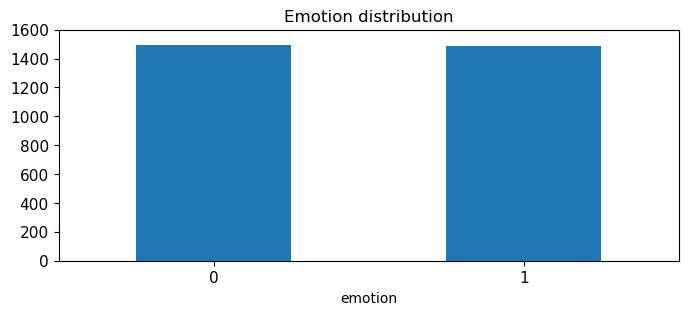

In [105]:
DF.emotion.value_counts().plot(kind = 'bar',
                                    title = 'Emotion distribution',
                                    ylim = [0, 1600],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [111]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
DF_counts = count_vect.fit_transform(DF.text) #learn the vocabulary and return document-term matrix
print(DF_counts.shape)
print(DF_counts[0])

(2983, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [113]:
count_vect.get_feature_names_out()[144]

'adventure'

In [114]:
count_vect.get_feature_names_out()[500]

'blandest'

In [116]:
count_vect.get_feature_names_out()[1643]

'explorations'

In [117]:
count_vect.get_feature_names_out()[2965]

'muddy'

In [118]:
count_vect.get_feature_names_out()[3279]

'pearls'

In [119]:
count_vect.get_feature_names_out()[4610]

'toactivate'

In [121]:
count_vect.get_feature_names_out()[5154]

'zombiez'

In [122]:
analyze = count_vect.build_analyzer()
analyze(DF.text[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [132]:
DF_counts[0:5,0:50].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

In [145]:
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[50:70]]
plot_y = ["doc_" + str(i) for i in list(DF.index)[50:70]]
plot_z = DF_counts[50:70, 50:70].toarray() #DF_counts[how many documents, how many terms]



term_510  term_5320  term_54  term_5lb  term_680  term_70  term_70000  \
doc_50         0          0        0         0         0        0           0   
doc_51         0          0        0         0         0        0           0   
doc_52         0          0        0         0         0        0           0   
doc_53         0          0        0         0         0        0           0   
doc_54         0          0        0         0         0        0           0   
doc_55         0          0        0         0         0        0           0   
doc_56         0          0        0         0         0        0           0   
doc_57         0          0        0         0         0        0           0   
doc_58         1          0        0         0         0        0           0   
doc_59         0          0        0         0         0        0           0   
doc_60         0          0        0         0         0        0           0   
doc_61         0          0        0         0         0        0           0   
doc_62         0          0        0         0         0        0           0   
doc_63         0          0        0         0         0        0           0   
doc_64         0          0        0         0         0        0           0   
doc_65         0          0        0         0         0        0           0   
doc_66         0          0        0         0         0        0           0   
doc_67         0          0        0         0         0        0           0   
doc_68         0          0        0         0         0        0           0   
doc_69         0          0        0         0         0        0           0   

        term_700w  term_70s  term_80  term_80s  term_8125  term_85  term_8525  \
doc_50          0         0        0         0          0        0          0   
doc_51          0         0        0         0          0        0          0   
doc_52          0         0        0         0          0        0          0   
doc_53          0         0        0         0          0        0          0   
doc_54          0         0        0         0          0        0          0   
doc_55          0         0        0         0          0        0          0   
doc_56          0         0        0         0          0        0          0   
doc_57          0         0        0         0          0        0          0   
doc_58          0         0        0         0          0        0          0   
doc_59          0         0        0         0          0        0          0   
doc_60          0         0        0         0          0        0          0   
doc_61          0         0        0         0          0        0          0   
doc_62          0         0        0         0          0        0          0   
doc_63          0         0        0         0          0        0          0   
doc_64          0         0        0         0          0        0          0   
doc_65          0         0        0         0          0        0          0   
doc_66          0         0        0         0          0        0          0   
doc_67          0         0        0         0          0        0          0   
doc_68          0         0        0         0          0        0          0   
doc_69          0         0        0         0          0        0          0   

        term_8530  term_8pm  term_90  term_95  term_99  term_aailiyah  
doc_50          0         0        0        0        0              0  
doc_51          0         0        0        0        0              0  
doc_52          0         0        0        0        0              0  
doc_53          0         0        0        0        0              0  
doc_54          0         0        0        0        0              0  
doc_55          0         0        0        0        0              0  
doc_56          0         0        0        0        0              0  
doc_57          0         0 

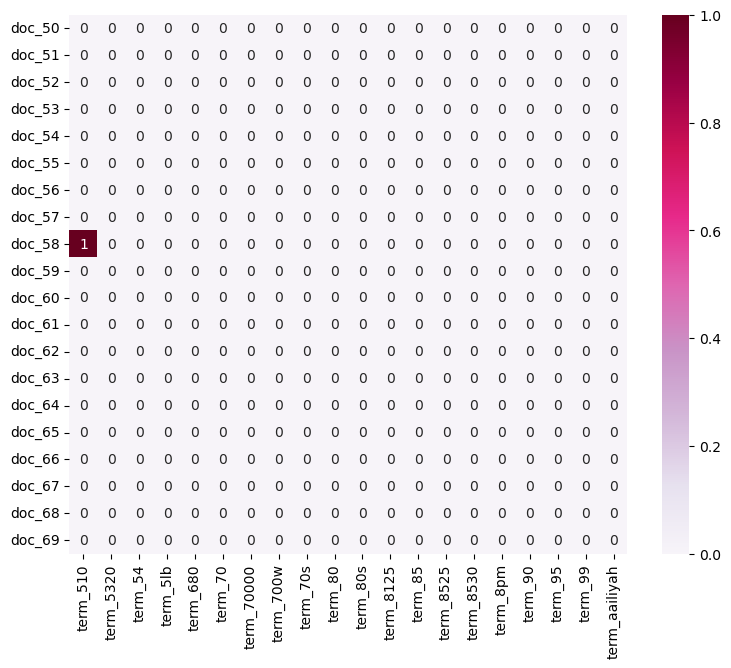

In [146]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize = (9, 7))
ax = sns.heatmap(df_todraw,
                 cmap = "PuRd",
                 vmin = 0, vmax = 1, annot = True)

In [148]:
from sklearn.decomposition import PCA
print(DF_counts.shape)
DF_reduced = PCA(n_components = 2).fit_transform(DF_counts.toarray())
print(DF_reduced.shape)

(2983, 5155)
(2983, 2)


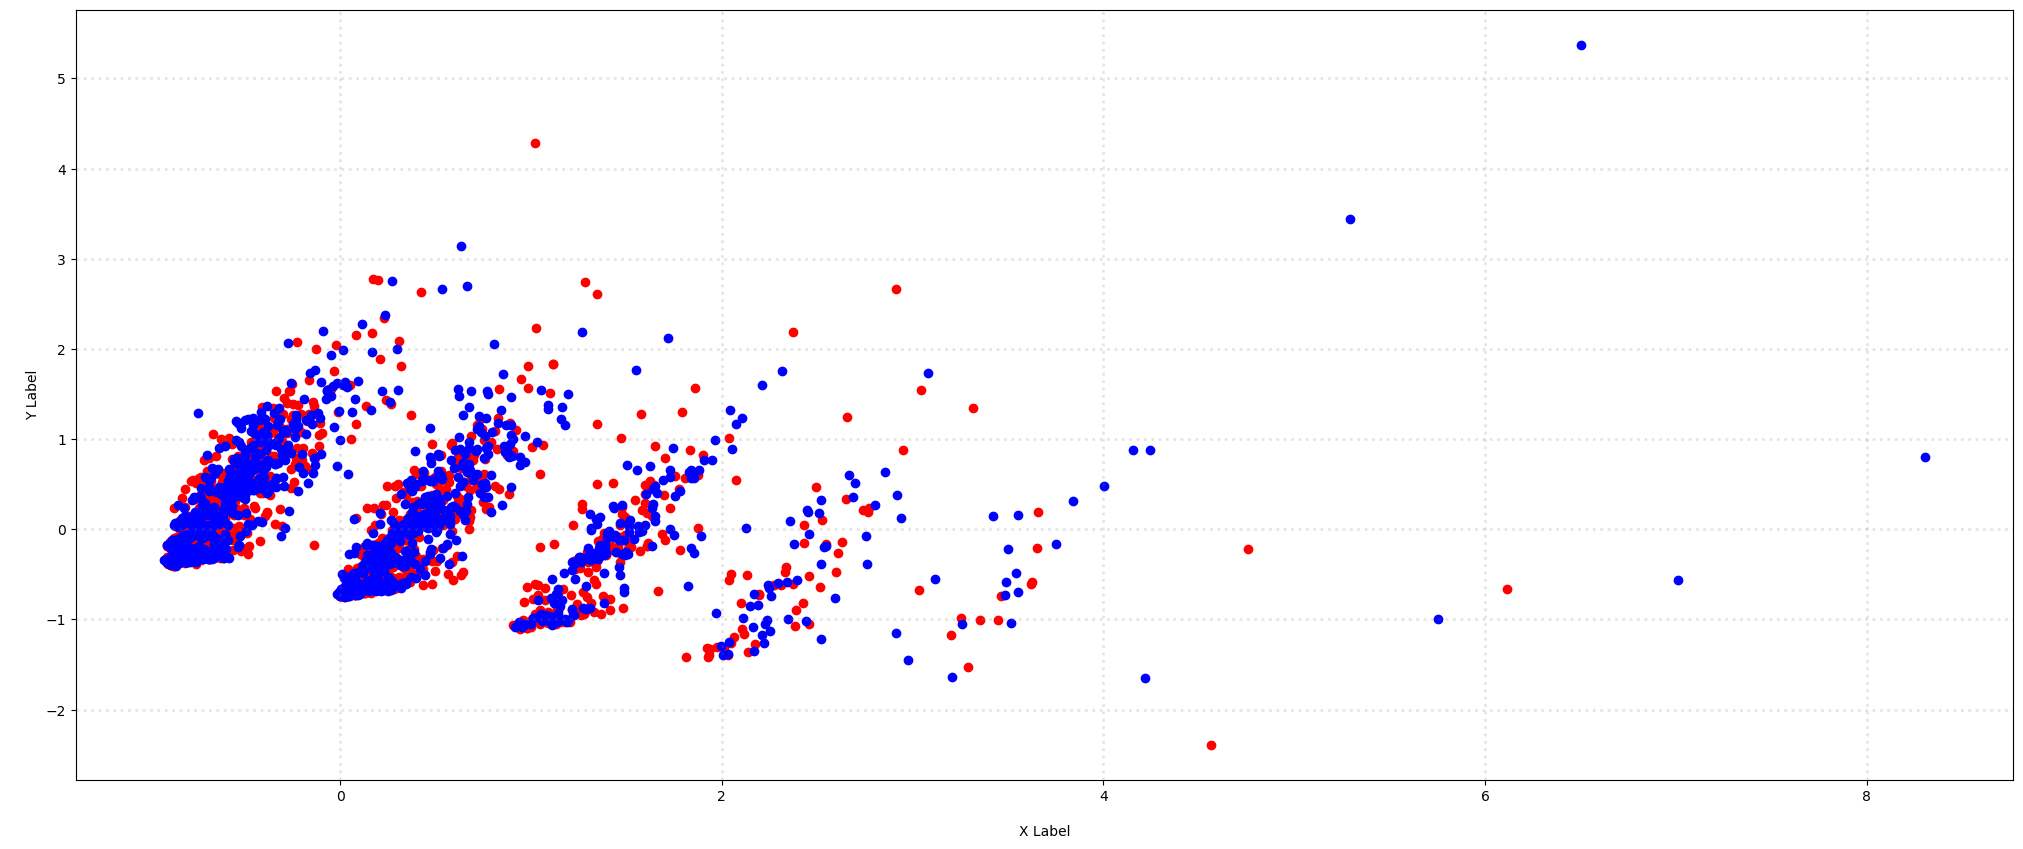

In [151]:
col = ['red','blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

emotion = [0,1]

for c, emo in zip(col, emotion):
    xs = DF_reduced[DF['emotion'] == emo].T[0]
    ys = DF_reduced[DF['emotion'] == emo].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color = 'gray', linestyle = ':', linewidth = 2, alpha = 0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

5155


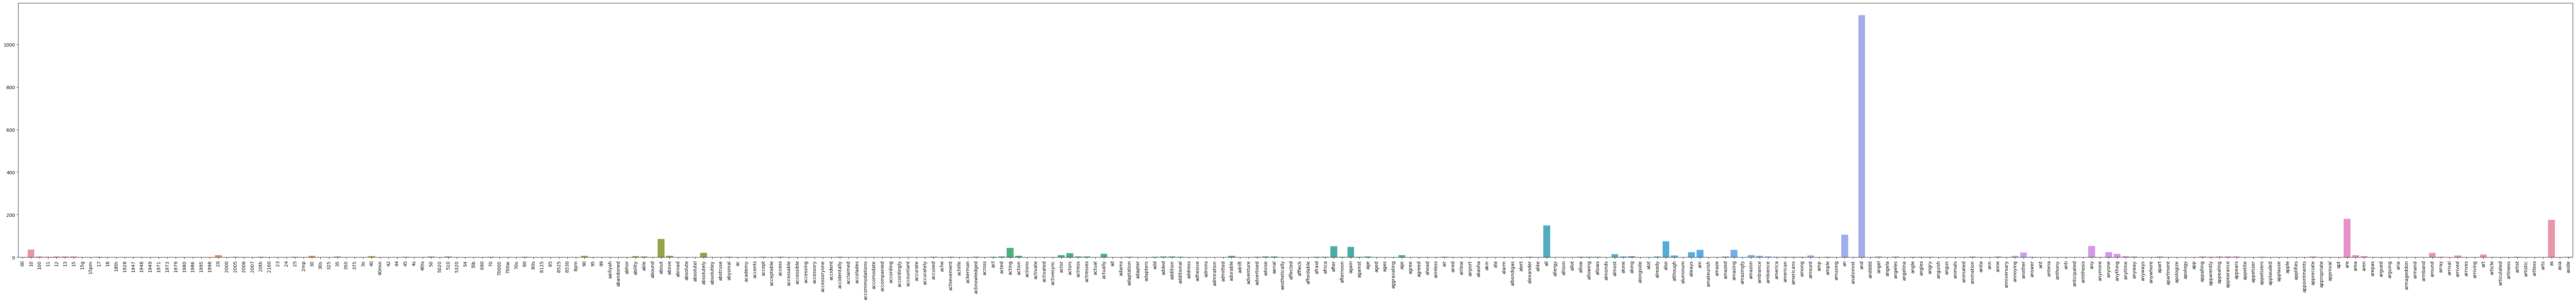

In [152]:
term_frequencies = []
print(DF_counts.shape[1])
for j in range(0,DF_counts.shape[1]):
    term_frequencies.append(sum(DF_counts[:,j].toarray()))

    
term_frequencies = np.asarray(DF_counts.sum(axis = 0))[0]

plt.subplots(figsize = (100, 10))
g = sns.barplot(x = count_vect.get_feature_names_out()[:300], 
            y = term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


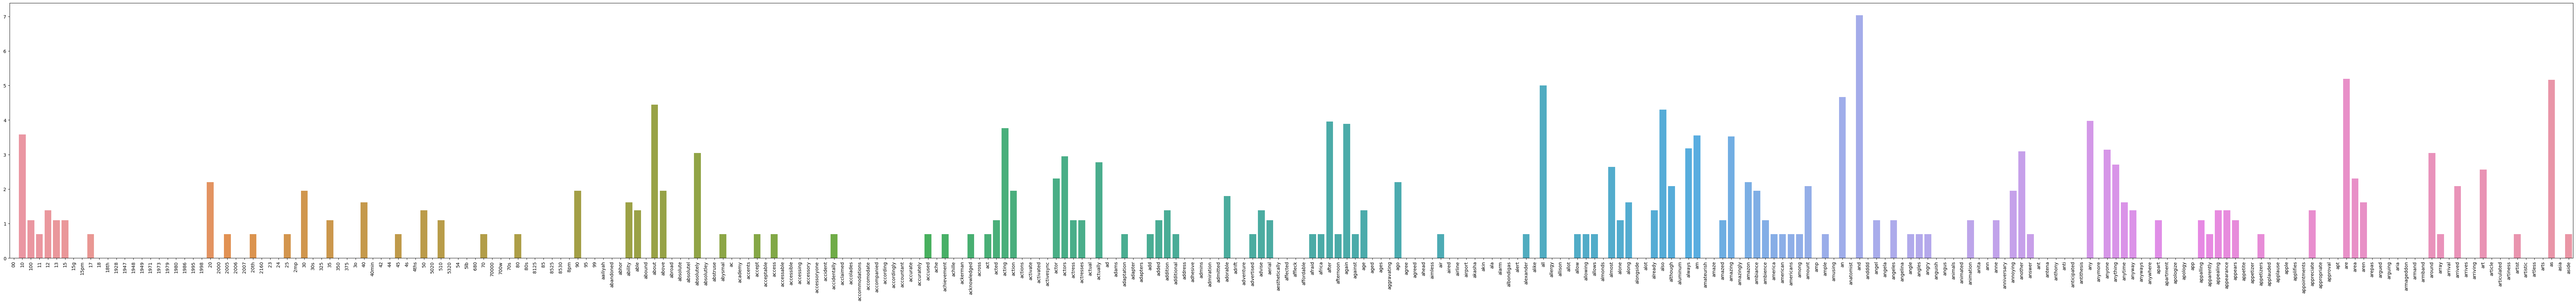

In [153]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize = (100, 10))
g = sns.barplot(x = count_vect.get_feature_names_out()[:300],
                y = term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [159]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()

mlb.fit(DF.emotion)

DF['bin_emotion'] = mlb.transform(DF['emotion']).tolist()

DF[0:9]

text  emotion bin_emotion
0  So there is no way for me to plug it in here i...        0         [0]
1                        Good case, Excellent value.        1         [1]
2                             Great for the jawbone.        1         [1]
3  Tied to charger for conversations lasting more...        0         [0]
4                                  The mic is great.        1         [1]
5  I have to jiggle the plug to get it to line up...        0         [0]
6  If you have several dozen or several hundred c...        0         [0]
7        If you are Razr owner...you must have this!        1         [1]
8                Needless to say, I wasted my money.        0         [0]

In [160]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = DF.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = DF.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = DF.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)


In [161]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [162]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [163]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


In [164]:
##### Third Part #####

In [166]:
#DF.drop(columns = ['bin_emotion'], inplace = True)
DF

text  emotion
0     So there is no way for me to plug it in here i...        0
1                           Good case, Excellent value.        1
2                                Great for the jawbone.        1
3     Tied to charger for conversations lasting more...        0
4                                     The mic is great.        1
...                                                 ...      ...
2978  I think food should have flavor and texture an...        0
2979                           Appetite instantly gone.        0
2980  Overall I was not impressed and would not go b...        0
2981  The whole experience was underwhelming, and I ...        0
2982  Then, as if I hadn't wasted enough of my life ...        0

[2983 rows x 2 columns]

In [167]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 839.1 kB/s eta 0:00:0000:0100:01
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.3.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (33 kB)
  Using cached idna-3.6-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached certifi-2023.11.17-py3-none-any.whl.metadata (2.2 kB)
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
Using cached certifi-2023.11.17-py3-none-any.whl (162 kB)
Using cached charset_normalizer-3.3.2-cp311-cp311-macosx_10_9_x86_64.whl (121 kB)
Using cached idna-3.6-py3-none-any.whl (61 kB)
Using cached urllib3-2.1.0-py3-none-any.whl (104 kB)

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [168]:
#check the relationship between sentiment score and emotion score(0 or 1) for each row text
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentimentAnalyser = SentimentIntensityAnalyzer()

pd.options.display.max_colwidth = 400

In [174]:
#example1
sentimentAnalyser.polarity_scores("Data mining is so hard!")


{'neg': 0.35, 'neu': 0.65, 'pos': 0.0, 'compound': -0.2865}

In [175]:
#example2
sentimentAnalyser.polarity_scores("Hope I will not fail on this course!")

{'neg': 0.0, 'neu': 0.498, 'pos': 0.502, 'compound': 0.722}

In [236]:
#store the several useful stats

neg_0 = [] #negative score when emotion is 0
pos_0 = [] #positive score when emotion is 0
neu_0 = [] #neutral score when emotion is 0
com_0 = [] #compound score when emotion is 0
neg_1 = [] #negative score when emotion is 1
pos_1 = [] #positive score when emotion is 1
neu_1 = [] #neutral score when emotion is 1
com_1 = [] #compound score when emotion is 1
compound_sentiment_score = [] #record the compound score for every row of text data

for i in range(0, len(DF)):
    text = DF['text'][i]
    score = sentimentAnalyser.polarity_scores(text)
    compound_sentiment_score.append(score['compound'])
    if DF['emotion'][i] == 0:
        neg_0.append(score['neg'])
        pos_0.append(score['pos'])
        neu_0.append(score['neu'])
        com_0.append(score['compound'])
    else:
        neg_1.append(score['neg'])
        pos_1.append(score['pos'])
        neu_1.append(score['neu'])
        com_1.append(score['compound'])




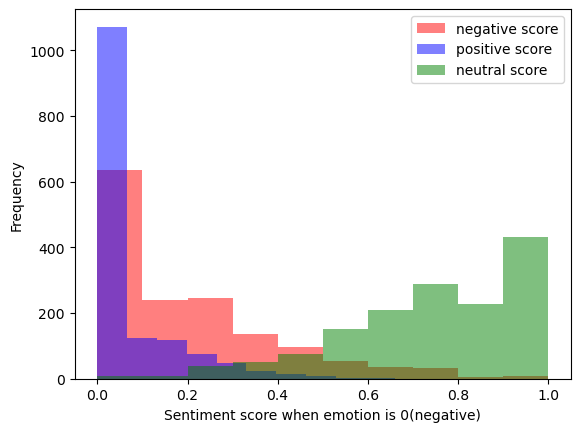

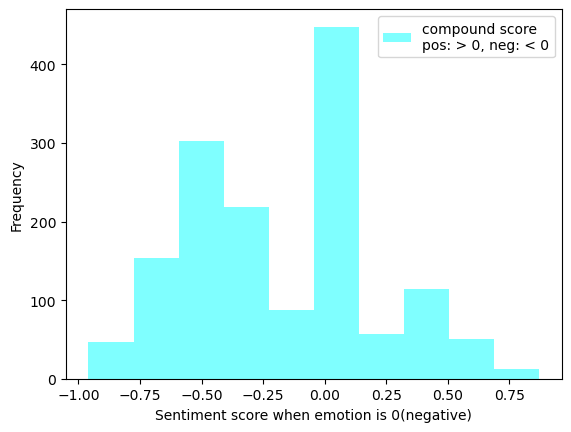

In [239]:
#plot the histogram for when the text is classified to 0(negative)

import matplotlib.pyplot as plt

plt.hist(neg_0, bins = 10, color = 'red', alpha = 0.5, label = 'negative score')
plt.hist(pos_0, bins = 10, color = 'blue', alpha = 0.5, label = 'positive score')
plt.hist(neu_0, bins = 10, color = 'green', alpha = 0.5, label = 'neutral score')


plt.xlabel("Sentiment score when emotion is 0(negative)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


plt.hist(com_0, bins = 10, color = 'cyan', alpha = 0.5, label = 'compound score\npos: > 0, neg: < 0')


plt.xlabel("Sentiment score when emotion is 0(negative)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

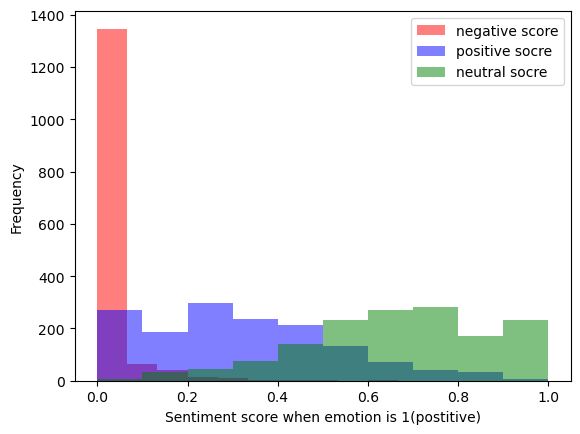

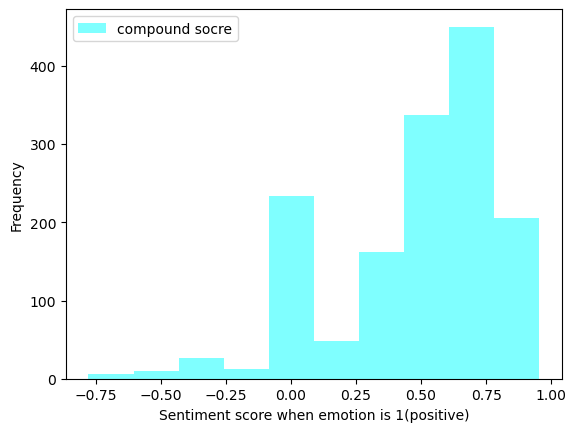

In [194]:
#plot the histogram for when the text is classified to 1(positive)

import matplotlib.pyplot as plt

plt.hist(neg_1, bins = 10, color = 'red', alpha = 0.5, label = 'negative score')
plt.hist(pos_1, bins = 10, color = 'blue', alpha = 0.5, label = 'positive socre')
plt.hist(neu_1, bins = 10, color = 'green', alpha = 0.5, label = 'neutral socre')


plt.xlabel("Sentiment score when emotion is 1(postitive)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


plt.hist(com_1, bins = 10, color = 'cyan', alpha = 0.5, label = 'compound socre')


plt.xlabel("Sentiment score when emotion is 1(positive)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [205]:
#TFIDF and document matrix

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
DF_TFIDF = vectorizer.fit_transform(DF['text'])

tfidf_tokens = vectorizer.get_feature_names_out()

import pandas as pd

index = []
for i in range(0,DF_TFIDF.shape[0]):
    index.append("Doc" + str(i + 1))

doc_matrix = pd.DataFrame(
    data = DF_TFIDF.toarray(), 
    index = index, 
    columns = tfidf_tokens
)

doc_matrix

00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
Doc1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
Doc2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
Doc3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
Doc4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
Doc5     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
Doc2979  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
Doc2980  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
Doc2981  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
Doc2982  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
Doc2983  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

         yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  
Doc1     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
Doc2     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
Doc3     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
Doc4     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
Doc5     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
...      ...    ...  ...    ...   ...      ...     ...      ...  
Doc2979  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
Doc2980  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
Doc2981  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
Doc2982  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
Doc2983  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  

[2983 rows x 5155 columns]

In [262]:
# Funciton for visualizing confusion_matrix, copied from Lab2 Master
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(way, cm, classes, title='Confusion matrix',
                          cmap = sns.cubehelix_palette(as_cmap = True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax = ax)
    
    ### changed by me
    if way == 1:
        X = 'True label'
        Y = 'Predicted label'
    elif way == 2:
        X = 'emotion1'
        Y = 'emotion2'
    
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = X,
           ylabel = Y)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", color = "white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

For training data:


Accuracy: 0.838223

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1186
           1       0.84      0.84      0.84      1200

    accuracy                           0.84      2386
   macro avg       0.84      0.84      0.84      2386
weighted avg       0.84      0.84      0.84      2386



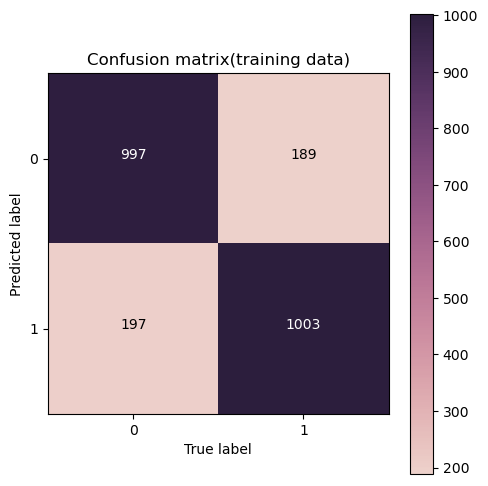

For testing data:


Accuracy: 0.788945

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       307
           1       0.77      0.80      0.79       290

    accuracy                           0.79       597
   macro avg       0.79      0.79      0.79       597
weighted avg       0.79      0.79      0.79       597



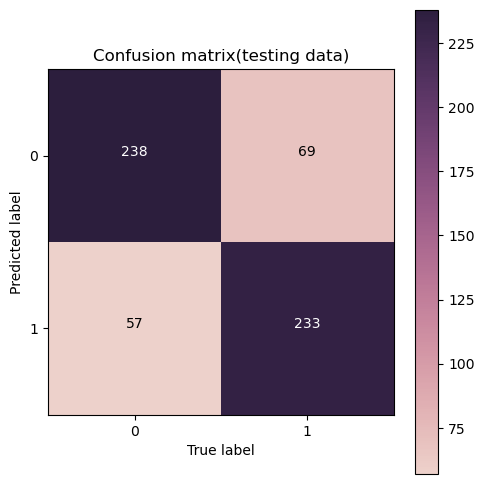

In [263]:
#simple Naive Bayes Classifier(Multinomial NB)
#for word frequency feature, I use BOW.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

BOW_vectorizer = CountVectorizer() 

BOW = CountVectorizer(max_features = 500) 


X_train, X_test, y_train, y_test = train_test_split(
    BOW.fit_transform(DF['text']), DF['emotion'], test_size = 0.2, random_state = 42)

NB = MultinomialNB(force_alpha = True)
NB.fit(X_train, y_train)

y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

classification_rep_train = classification_report(y_train, y_train_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("For training data:\n\n")
print("Accuracy: %f\n" % accuracy_train)
print("Classification Report:\n", classification_rep_train)
plot_confusion_matrix(1, cm_train, classes = [0,1], title = 'Confusion matrix(training data)')


print("For testing data:\n\n")
print("Accuracy: %f\n" % accuracy_test)
print("Classification Report:\n", classification_rep_test)
plot_confusion_matrix(1, cm_test, classes = [0,1], title = 'Confusion matrix(testing data)')


For training data:


Accuracy: 0.841576

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1186
           1       0.84      0.84      0.84      1200

    accuracy                           0.84      2386
   macro avg       0.84      0.84      0.84      2386
weighted avg       0.84      0.84      0.84      2386



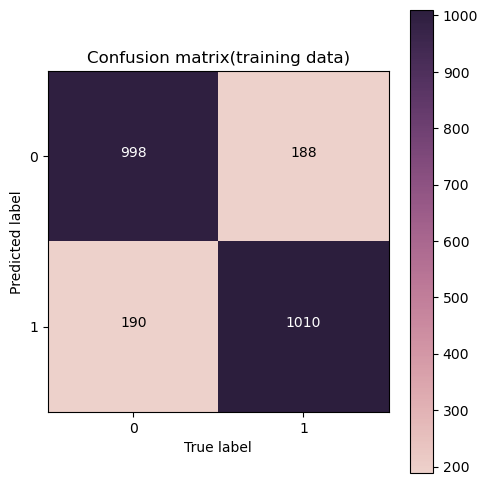

For testing data:


Accuracy: 0.787270

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       307
           1       0.77      0.80      0.79       290

    accuracy                           0.79       597
   macro avg       0.79      0.79      0.79       597
weighted avg       0.79      0.79      0.79       597



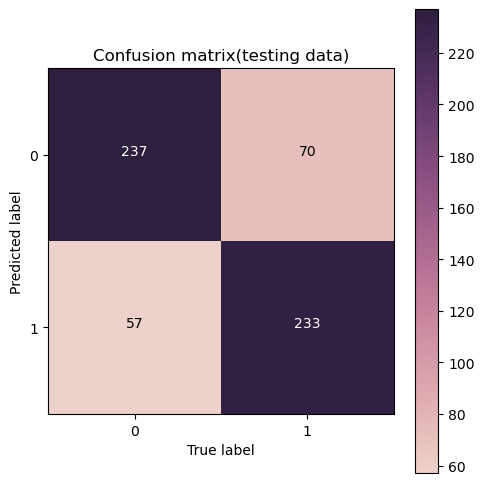

In [265]:
#simple Naive Bayes Classifier(Multinomial NB)
#use TFIDF this time

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features = 500)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    tfidf_vectorizer.fit_transform(DF['text']), DF['emotion'], test_size = 0.2, random_state = 42)

NB2 = MultinomialNB(force_alpha = True)
NB2.fit(X_train2, y_train2)

y_train_pred2 = NB2.predict(X_train2)
y_test_pred2 = NB2.predict(X_test2)

accuracy_train2 = accuracy_score(y_train2, y_train_pred2)
accuracy_test2 = accuracy_score(y_test2, y_test_pred2)

classification_rep_train2 = classification_report(y_train2, y_train_pred2)
classification_rep_test2 = classification_report(y_test2, y_test_pred2)

cm_train2 = confusion_matrix(y_train2, y_train_pred2)
cm_test2 = confusion_matrix(y_test2, y_test_pred2)

print("For training data:\n\n")
print("Accuracy: %f\n" % accuracy_train2)
print("Classification Report:\n", classification_rep_train2)
plot_confusion_matrix(1, cm_train2, classes = [0,1], title = 'Confusion matrix(training data)')


print("For testing data:\n\n")
print("Accuracy: %f\n" % accuracy_test2)
print("Classification Report:\n", classification_rep_test2)
plot_confusion_matrix(1, cm_test2, classes = [0,1], title = 'Confusion matrix(testing data)')


In [234]:
#the two methods above lead to the similar result and classification effectiveness, I speculate that the possible reason are:

#1.The parameters used in the two methods are same
#2.The size of dataset isn't large enough.
#3.The classifier used in the two methods are same.

In [243]:
##### Fourth Part #####

#I didn't notice something obviously wrong for the dataset. But in the third part, I used another sentiment analysis
#method and found that the result of the two methods are a little inconsistent. For example, some text was classified positive
#but in the other method was classified negative.

emotion_method2 = []
for i in range(0,len(compound_sentiment_score)):
    if compound_sentiment_score[i] >= 0:
        emotion_method2.append(1)
    else:
        emotion_method2.append(0)

DF['emotion2'] = emotion_method2

DF

text  \
0                                                         So there is no way for me to plug it in here in the US unless I go by a converter.   
1                                                                                                                Good case, Excellent value.   
2                                                                                                                     Great for the jawbone.   
3                                                            Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!   
4                                                                                                                          The mic is great.   
...                                                                                                                                      ...   
2978                                                                      I think food should have flavor and texture and both were lacking.   
2979                                                                                                                Appetite instantly gone.   
2980                                                                                      Overall I was not impressed and would not go back.   
2981                                             The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.   
2982  Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check.   

      emotion  emotion2  
0           0         0  
1           1         1  
2           1         1  
3           0         0  
4           1         1  
...       ...       ...  
2978        0         1  
2979        0         1  
2980        0         0  
2981        0         1  
2982        0         1  

[2983 rows x 3 columns]

ACC: 0.754945 
              precision    recall  f1-score   support

           0       0.93      0.55      0.69      1493
           1       0.68      0.96      0.80      1490

    accuracy                           0.75      2983
   macro avg       0.81      0.76      0.74      2983
weighted avg       0.81      0.75      0.74      2983



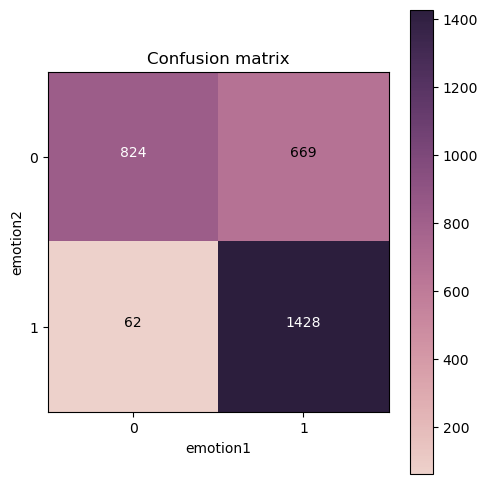

In [266]:
#the difference is a little significant

EMO1 = DF['emotion']
EMO2 = DF['emotion2']

acc = accuracy_score(EMO1, EMO2)
print("ACC: %f " % acc)

CR = classification_report(EMO1, EMO2)
print(CR)

CM = confusion_matrix(EMO1, EMO2)
plot_confusion_matrix(2, CM, classes = [0,1], title = 'Confusion matrix')

In [267]:
##### Fifth Part #####

#included from First Part to Fourth Part